<a href="https://colab.research.google.com/github/charaf19/data_visualization/blob/main/Getting_better_in_pandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Get the data**

In [1]:
import pandas as pd

In [2]:
#getting the dataset
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
#show the data 
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **1.Generate descritve statistics Numeric and non numeric values**

In [5]:
#it counts only the numeric values
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#getting the description for all the dataset 
df.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## **2.Count of distinct elements**

In [10]:
df.nunique(axis=0)

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

## **3.Use plotly for pandas charts**

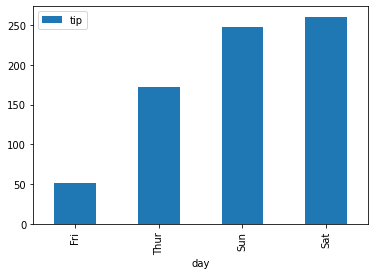

In [13]:
#by using the matplotlib 
df.groupby(by=['day']).sum()[['tip']].sort_values(by=['tip']).plot(kind='bar')

In [14]:
#changing from matplot lib to plotly
pd.options.plotting.backend='plotly'
df.groupby(by=['day']).sum()[['tip']].sort_values(by=['tip']).plot(kind='bar')

## **4.Pandas and Numpy where function**

# pandas where replace function 

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
df['tip'].where(df['tip']>2)

0       NaN
1       NaN
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240     NaN
241     NaN
242     NaN
243    3.00
Name: tip, Length: 244, dtype: float64

In [30]:
avg = df['tip'].mean()
avg

2.99827868852459

In [32]:
#getting the data bellow the average
df_copy = df.copy()
df_copy["tip"] = df["tip"].where(df["tip"] > avg,'bellow average')
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,bellow average,Female,No,Sun,Dinner,2
1,10.34,bellow average,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **5.Style your Dataframe**

In [38]:
def make_pretty(styler):
    styler.set_caption("Tips in USD")
    styler.format({"total_bill": "USD {:.1f}", "tip": "USD {:.1f}", "size": "{} seats"})
    styler.background_gradient(cmap="RdYlGn", subset=["total_bill", "tip"])
    styler.set_table_styles([{"selector": "th.col_heading", "props": [("background-color", "#d3d3d3")]}])
    styler.hide(subset=["sex", "smoker"], axis=1)
    styler.bar(subset=["size"])

    return styler

In [40]:
df.head().style.pipe(make_pretty)

AttributeError: ignored